In [1]:
print("hello world")

hello world


In [2]:
! pip install cv2

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


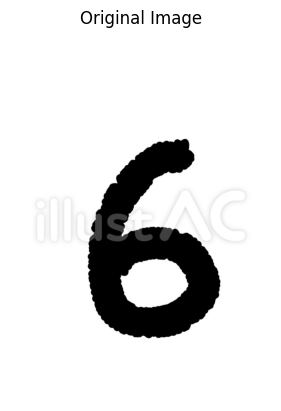

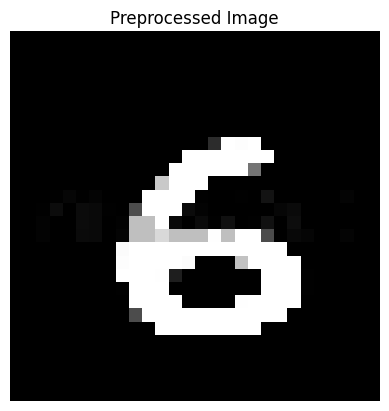

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.8475 - loss: 0.4738 - val_accuracy: 0.9825 - val_loss: 0.0521
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9727 - loss: 0.0888 - val_accuracy: 0.9873 - val_loss: 0.0363
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9788 - loss: 0.0670 - val_accuracy: 0.9885 - val_loss: 0.0332
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.9834 - loss: 0.0536 - val_accuracy: 0.9879 - val_loss: 0.0354
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9869 - loss: 0.0446 - val_accuracy: 0.9906 - val_loss: 0.0298
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.9877 - loss: 0.0380 - val_accuracy: 0.9901 - val_loss: 0.0279
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9894 - loss: 0.0332 - val_accuracy: 0.9899 - val_loss: 0.0300
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9898 - loss: 0.0296 - 

In [4]:
# Step 0: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Step 1: Load your image from file
# Replace 'your_image.png' with the path to your image file
img = cv2.imread('6.jpeg', cv2.IMREAD_GRAYSCALE)

# Optional: Display original image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Step 2: Resize to 28x28 (model input size)
img_resized = cv2.resize(img, (28, 28))

# Optional: Invert image if digit is black on white background
img_resized = 255 - img_resized

# Step 3: Normalize the pixel values
img_normalized = img_resized.astype('float32') / 255.0

# Step 4: Reshape to (1, 28, 28, 1) for CNN input
img_preprocessed = img_normalized.reshape((1, 28, 28, 1))

# Step 5: Display preprocessed image
plt.imshow(img_preprocessed[0, :, :, 0], cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()

# Step 6: Load MNIST dataset for training
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 7: Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Step 8: Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 9: Train the model
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

# Step 10: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Step 11: Predict your image
prediction = model.predict(img_preprocessed)
predicted_digit = np.argmax(prediction)
print("Predicted Digit:", predicted_digit)

c:\Users\Sameeksha Shetty\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)


Classification Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


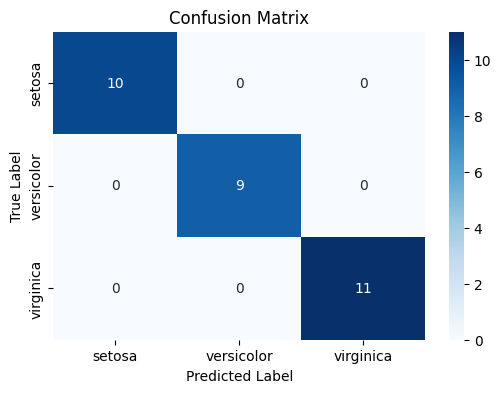

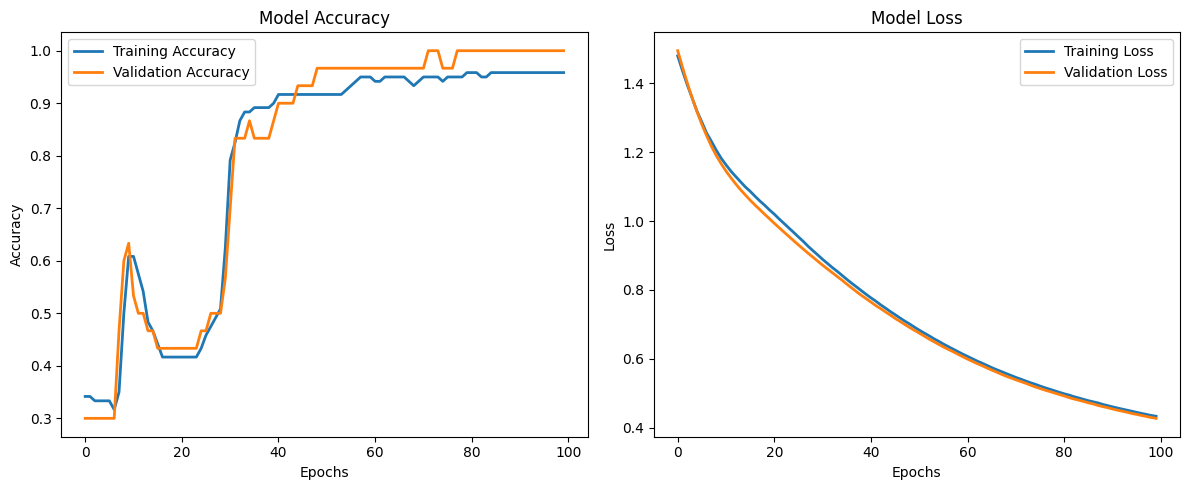

In [1]:
# Step 0: Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Load the Iris dataset
iris = load_iris()
x = iris.data               # Features: 4 measurements per flower
y = iris.target             # Labels: 0, 1, 2 representing 3 flower types

# Step 2: Split the data and prepare one-hot encoding
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

num_classes = 3
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Step 3: Define the neural network model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))  # Input layer with 4 features
model.add(Dense(num_classes, activation='softmax'))        # Output layer with 3 neurons

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model architecture summary
model.summary()

# Step 4: Train the model
history = model.fit(x_train, y_train_one_hot,
                    epochs=100,
                    validation_data=(x_test, y_test_one_hot),
                    verbose=0)  # verbose=0 disables console output

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"\nClassification Accuracy: {accuracy * 100:.2f}%")

# Optional: Confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optional: Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()